In [1]:
import os
import typing

import joblib
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection
import sklearn.metrics
import sklearn.pipeline
import sklearn.preprocessing

import tlp

In [10]:
index = 1
filename = 'auc_all_features.float'
features = None

In [12]:
X = dict()

data_dir = os.path.join('data', f'{index:02}')
result_file = os.path.join(data_dir, 'scores', filename)

# If features are not calculated yet, quit.
if not os.path.isdir(os.path.join(data_dir, 'features')): print('No feature construction yet')

# Get all calculated features.
for file in os.scandir(os.path.join(data_dir, 'features')):
  if features is None or file.name in features:
    X.update(joblib.load(file.path))
X = pd.DataFrame(X)

# Get targets
y = np.load(os.path.join(data_dir, 'targets_sampled.npy'))

# Fit and predict pipeline
X_train, X_test, y_train, y_test = (
  sklearn.model_selection.train_test_split(X, y))
pipe = sklearn.pipeline.make_pipeline(
  sklearn.preprocessing.StandardScaler(),
  sklearn.linear_model.LogisticRegression(max_iter=10000)) # type: ignore
pipe.fit(X_train, y_train)
auc = sklearn.metrics.roc_auc_score(
  y_true=y_test, y_score=pipe.predict_proba(X_test)[:,1]) # type: ignore

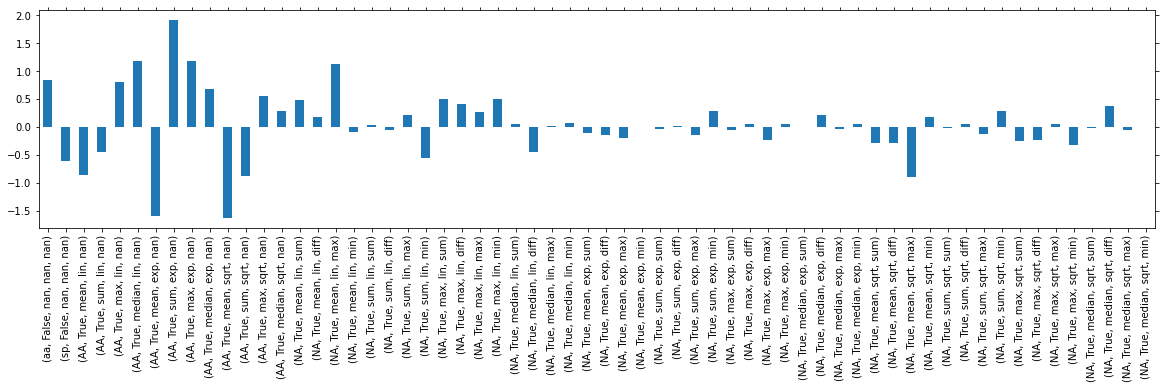

In [53]:
import matplotlib.pyplot as plt
with plt.rc_context({'xtick.top': True, 'ytick.right': True, 'figure.figsize': (20, 4)}):
  pd.Series(pipe['logisticregression'].coef_[0], index=X.columns).plot.bar()

In [62]:
pd.DataFrame(pipe['standardscaler'].transform(X), columns=X.columns).agg(['min', 'max']).plot.ba

aa         sp         AA                                   \
         False      False      True                                     
           NaN        NaN       mean        sum        max     median   
           NaN        NaN        lin        lin        lin        lin   
           NaN        NaN        NaN        NaN        NaN        NaN   
min  -0.784478  -0.393362  -0.980883  -0.397306  -1.018467  -0.977533   
max  17.610372  26.951141  14.210829  36.728846  14.039768  14.032921   

                                                 ...        NA             \
                                                 ...     True               
          mean        sum        max     median  ...       sum              
           exp        exp        exp        exp  ...      sqrt              
           NaN        NaN        NaN        NaN  ...       max        min   
min  -0.861256  -0.402998  -0.906524  -0.850753  ... -0.832760  -0.708266   
max  14.197416  32.588314  12.552314  14.116598  ...  9.152789  12.878580   

                                                                            \
                                                                             
          max                                   median                       
         sqrt                                     sqrt                       
          sum      diff        max       min       sum      diff       max   
min -6.382222 -3.878931 -11.798586 -3.557043 -4.387288 -3.346946 -5.938151   
max  0.619638  4.347492   0.280735  0.646265  1.382491  3.331200  0.883689   

               
               
               
               
          min  
min -2.672653  
max  1.437096  

[2 rows x 62 columns]

In [44]:
np.sum(pipe['logisticregression'].coef_[0]*X.iloc[0].values)

-2.6766371773904734

In [48]:
pipe['logisticregression'].predict_proba(X)

array([[9.26844489e-01, 7.31555106e-02],
       [5.58334059e-01, 4.41665941e-01],
       [9.99996916e-01, 3.08437107e-06],
       ...,
       [9.15249975e-01, 8.47500248e-02],
       [8.15398303e-02, 9.18460170e-01],
       [2.97656529e-01, 7.02343471e-01]])